In [30]:
%matplotlib inline
import os
import math 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import random
from scipy.stats import pearsonr
from matplotlib.colors import rgb2hex
pd.options.display.max_columns=999

sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')

ahba_dir     = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/SEPT10/AHBA'
#ahba_dir     = '/scr/malta3/workspace/project_iron/AHBA'
save_fig_dir = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python_v2'


drop_strings = ['coords_native', 'donor_names', 'struct_id', 
                'struct_name', 'top_struct', 'Mean', 'Median', 
                'PC1', 'PC2','PC3', 'corrected_mni_x', 'corrected_mni_y', 
                'corrected_mni_z']

# Geneset contents

In [31]:
##################################################################################################
# Genesets 
##################################################################################################

GS_IRON_H   = ['FTH1','FTL' ,'HFE','HFE2','IL1A', 'IL6', 'IL6R','IREB2','SLC40A1','TF','TFR2','TNF',]
GS_IRON_D = ['THRSP', 'TF', 'MAL', 'KLK6', 'HOMER1', 'MOBP', 'APOD', 'MOG', 'CRYAB', 'APOC1', 'CA2', 'RASGRP1', 
          'STMN4', 'LYZ','GSTM1', 'CTSS',  'DCK' ]

GS_IRON_IH = ['ABCB6', 'ABCB7', 'ABCG2', 'ACO1', 'ALAS2', 'BMP6', 'CP', 'CYBRD1',  'FLVCR1', 'FTH1',  'FTHL17',
              'FTL', 'FTMT', 'FXN', 'GDF2', 'HAMP', 'HEPH', 'HFE', 'HFE2', 'HIF1A', 'HMOX1', 'HMOX2', 'HPX', 'IREB2', 'ISCU', 'LCN2',
              'LTF', 'MYC', 'NDFIP1', 'NUBP1', 'SCARA5', 'SLC11A1', 'SLC11A2', 'SLC22A17', 'SLC40A1', 'SLC46A1', 'SMAD4', 'SOD1',
              'SRI', 'TF', 'TFR2', 'TFRC', 'TMPRSS6', 'TTC7A']

GS_IRON_IM = ['HFE', 'MFI2', 'PICALM', 'SLC11A2', 'STEAP1', 'STEAP1B', 'STEAP2', 'STEAP3', 'STEAP4', 'TF', 
              'TFR2', 'TFRC']

GS_IRON_T1 = ['ABCB6', 'ABCB7', 'ABCG2', 'FLVCR1', 'FLVCR2', 'HPX', 'HRG', 'LCN2',
                   'SLC22A17', 'SLC46A1', 'SLC48A1']
GS_IRON_T2 = ['ABCG2', 'ATP6V0A2', 'ATP6V0A4', 'ATP6V0B', 'ATP6V0C', 'ATP6V0D1', 'ATP6V0D2', 'ATP6V0E1', 'ATP6V1A',
              'ATP6V1B1', 'ATP6V1B2', 'ATP6V1C1', 'ATP6V1C2', 'ATP6V1D', 'ATP6V1E1', 'ATP6V1E2', 'ATP6V1F', 'ATP6V1G1',
              'ATP6V1G2', 'ATP6V1G3', 'ATP6V1H', 'CP', 'CYBRD1', 'FLVCR1', 'FTH1', 'FTL', 'HEPH', 'HMOX1', 'HMOX2',
              'MCOLN1', 'SLC40A1', 'SLC46A1', 'STEAP3', 'TCIRG1', 'TF', 'TFRC']

GS_IRON_R = ['ABAT', 'ABCG2', 'ACO1', 'ALAD', 'APBB1', 'ATP7A', 'B2M', 'BCL2', 'BMP6', 'C1QA', 'CCNB1', 'CCND1',
             'CPOX', 'CYBRD1', 'CYP1A1', 'DRD2', 'FXN', 'GSK3B', 'HAMP', 'HFE', 'HMOX1', 'LCT', 'MDM2', 'PAWR',
             'PDX1', 'SLC11A2', 'SLC40A1', 'SLC6A3', 'SNCA', 'TF', 'TFAP2A', 'TFF1', 'TFR2', 'TFRC', 'UROD']



GS_DA     = ['COMT', 'DDC', 'MAOA', 'MAOB', 'NQO1', 'PPP2CA', 'PPP2CB', 'PRKACA', 'PRKACB','PRKACG', 'TH', 'TYR']
GS_DA_receptor_bind = ['GNA13', 'DLG4', 'DNM1', 'DNM2','DRD1', 'DRD3','GNA12','GNAS',  'ARRB2', 'ATP1A3', 'PALM', 
                    'CLIC6', 'PTPN11', 'PPP1R1B', 'DNAJC14', 'CAV2', 'SLC9A3R1']
GS_DA_receptor_sig  = ['ADCY5', 'ADCY6', 'ARRB2', 'CALY','DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5', 'FLNA', 
                   'GNA11', 'GNA14', 'GNA15', 'GNAI3', 'GNAL', 'GNAO1', 'GNAQ', 'GNAS', 'GNB1', 'GNG2', 
                   'GPR21', 'GPR52', 'GSK3A', 'GSK3B', 'HMP19', 'KLF16', 'OPRM1', 'RGS9', 'SLC9A3R1']
GS_DA_transport     = ['CHRM5','DRD1','PARK2','PARK7','SLC18A2','SLC22A1','SLC22A2','SLC22A3', 'SLC6A2',
                    'SLC6A3','SNCA']
GS_DA_transmission  = ['CDK5','CRH','CRHBP','DRD1','DRD2','DRD3','DRD4','DRD5','RASD2','TH']
GS_ANMC = ['ME1', 'ALDH5A1', 'GBE1', 'GALM', 'PYGL', 'CPS1','PFKFB3', 'PYGB', 'IDH2', 'ENO1','PPP1R1A', 
        'MDH2', 'CS','PYGM', 'PGM3', 'PHKG1', 'SLC3A2', 'PFKFB4', 'KHK','LDHB', 'PCK2','SLC2A8',  'PGM2', 
        'GPT','AKR1B1', 'NANS', 'PDK4','OGDHL','DHTKD1', 'PFKM', 'PGM1', 'PC','AGL']
GS_GLU  = ['UNC13B', 'RIMS1', 'GLS2', 'GLS', 'SLC38A2', 'SLC17A7', 'RAB3A', 'SLC1A1', 'SLC1A6', 'SLC1A7', 
        'SNAP25', 'STX1A', 'STXBP1','VAMP2', 'SYT1' ]
GS_GABA = ['GPHN', 'GABARAP','DNM1', 'GABRA1', 'GABRA2', 'GABRA3', 'GABRA4','GABRA5','GABRA6''SRC'] 
GS_GABA_GLU = GS_GLU + GS_GABA
GS_TF       = ['TF']
GS_FTH      = ['FTH1']
GS_FTL      = ['FTL']
GS_HRE      = ['HFE']
GS_HRE2     = ['HFE2']
GS_SLC25    = ['SLC25A37']
GS_SLC40    = ['SLC40A1']
GS_BIOBANK  = GS_TF + GS_FTH + GS_HRE + GS_SLC25
GS_FTH_ALL  = ['FTH1', 'FTH1P14', 'FTH1P20', 'FTHL17' ]
GS_FTL_ALL  = ['FTL', 'FTLP17']
GS_FERRITIN = GS_FTH_ALL + GS_FTL_ALL + ['FTMT']

GS_TCA = ['ACLY', 'ACO1', 'ACO2', 'CS', 'DLAT', 'DLD', 'DLST', 'FH', 'IDH1', 'IDH2', 'IDH3A', 'IDH3B',
          'IDH3G', 'LOC283398', 'LOC642502', 'MDH1', 'MDH2', 'OGDH', 'OGDHL', 'PC',  'PCK1',  'PCK2',
          'PDHA1', 'PDHA2', 'PDHB', 'SDHA', 'SDHB', 'SDHC', 'SDHD', 'SUCLA2', 'SUCLG1', 'SUCLG2']

GS_BTBD9 = ['BTBD9']
GS_ACO1 = ['ACO1']
GS_ACO2 = ['ACO2']
GS_ACO =  GS_ACO1+ GS_ACO2

# Grab expression dataframes

In [33]:
def return_expression_df(geneset):
    return pd.read_csv(os.path.join(ahba_dir, 'AHBA_%s.csv'%geneset),index_col=0)

IRON_H           = return_expression_df('IRON_HOMEOSTASIS_PCA')
IRON_D           = return_expression_df('IRON_D_PCA')
IRON_IH          = return_expression_df('IRON_ION_HOMEOSTASIS_PCA')
IRON_IM          = return_expression_df('IRON_ION_IMPORT_PCA')
IRON_IB          = return_expression_df('IRON_ION_BINDING_PCA')
IRON_T1          = return_expression_df('IRON_TRANSPORT1_PCA')
IRON_T2          = return_expression_df('IRON_TRANSPORT2_PCA')
IRON_R           = return_expression_df('IRON_RESPONSE_PCA')
ANMC             = return_expression_df('ANMC_PCA')
DA_met           = return_expression_df('DA_metabolism_PCA')
DA_receptor_sig  = return_expression_df('DA_receptor_sig_PCA')
DA_receptor_bind = return_expression_df('DA_receptor_PCA')
DA_transmission  = return_expression_df('DA_tranmission_PCA')
DA_transport     = return_expression_df('DA_transport_PCA')
ANMC             = return_expression_df('ANMC_PCA')
GLU              = return_expression_df('GLU_PCA')
GABA             = return_expression_df('GABA_PCA')
GLU_GABA         = return_expression_df('GLU_GABA_PCA')
FTH_ALL          = return_expression_df('FTH_ALL_PCA')
FERRITIN         = return_expression_df('FERRITIN_PCA')
FTL_ALL          = return_expression_df('FTL_ALL')
TF               = return_expression_df('TF')
FTH              = return_expression_df('FTH')
FTL              = return_expression_df('FTL')
HRE              = return_expression_df('HFE')
HRE2             = return_expression_df('HFE2')
SLC25            = return_expression_df('SLC25')
BIOBANK          = return_expression_df('BIOBANK_PCA')
BTBD9            = return_expression_df('BTBD9') 
TCA              = return_expression_df('TCA_PCA') 
ACO              = return_expression_df('ACO') 
ACO1             = return_expression_df('ACO1') 
ACO2             = return_expression_df('ACO2') 
HOUSEKEEPING     = return_expression_df('HOUSEKEEPING') 
HOUSEKEEPING_E   = return_expression_df('HOUSEKEEPING_EISENBERG') 
DA_allen         = return_expression_df('DA_allen_PCA')
DAT1             = return_expression_df('DAT1')
DRD1             = return_expression_df('DRD1')
DRD2             = return_expression_df('DRD2')
DRD3             = return_expression_df('DRD3')
DRD4             = return_expression_df('DRD4')
DRD_ALL          = return_expression_df('DRD_ALL_PCA')

# Concatenate geneset expression values
*Contains values for expression (a) Mean, (b) PCA scores and (c) Truncated-SVD scores

In [34]:
def concat_dfs(measure):
    df  = pd.DataFrame(index = IRON_H.index, 
                        columns = ['IRON', 'IRON_D', 'DA_met', 'DA_receptor_bind', 'DA_receptor_sig', 
                                   'DA_transmission', 'DA_transport', 'ANMC', 'GLU', 'GABA', 'GLU_GABA', 
                                   'TF', 'FTH', 'FTL', 'HRE', 'HRE2', 'SLC25', 'SLC40', 'BIOBANK',
                                   'BTBD9', 'TCA', 'ACO','ACO1', 'ACO2', 'HOUSEKEEPING', 'HOUSEKEEPING_E',
                                   'top_struct', 'struct'])
    xval = 1
    df['top_struct']        = IRON_H.top_struct
    df['struct']            = IRON_H.struct_name
    df['IRON_H']            = IRON_H[measure] * xval
    df['IRON_D']            = IRON_D[measure]
    df['IRON_IH']           = IRON_IH[measure] * xval
    df['IRON_IM']           = IRON_IM[measure] * xval
    df['IRON_IB']           = IRON_IB[measure] * xval
    df['IRON_T1']           = IRON_T1[measure] * xval
    df['IRON_T2']           = IRON_T2[measure] * xval
    df['IRON_R']            = IRON_R[measure] * xval
    df['DA_met']            = DA_met[measure] * xval
    df['DA_receptor_bind']  = DA_receptor_bind[measure] * xval
    df['DA_receptor_sig']   = DA_receptor_sig[measure] * xval
    df['DA_transmission']   = DA_transmission[measure] * xval
    df['DA_transport']      = DA_transport[measure] * xval
    df['ANMC']              = ANMC[measure] * xval
    df['GLU']               = GLU[measure] * xval
    df['GABA']              = GABA[measure] * xval
    df['GLU_GABA']          = GLU_GABA[measure] * xval
    df['FTH_ALL']           = FTH_ALL[measure] * xval    
    df['FERRITIN']          = FERRITIN[measure] * xval    
    df['TCA']               = TCA[measure] * xval    
    df['DA_allen']          = DA_allen[measure] * xval
    df['DRD_ALL']           = DRD_ALL[measure] * xval
    if measure not in ['PC1', 'PC2', 'PC3', 'SVD1g','SVD2g', 'SVD3p', 'SVD1p','SVD2p', 'SVD3p']: 
        df['FTL_ALL']           = FTL_ALL[measure] * xval    
        df['TF']                = TF['TF'] * xval
        df['FTH']               = FTH['FTH1'] * xval
        df['FTH1P14']           = FERRITIN['FTH1P14'] * xval    
        df['FTH1P20']           = FERRITIN['FTH1P20'] * xval    
        df['FTHL17']            = FERRITIN['FTHL17'] * xval    
        df['FTL']               = FTL['FTL'] * xval
        df['HFE']               = HRE['HFE'] * xval
        df['HFE2']              = HRE2['HFE2'] * xval
        df['SLC25']             = SLC25['SLC25A37'] * xval
        df['BTBD9']             = BTBD9['BTBD9'] * xval
        df['ACO']               = ACO[measure] * xval
        df['ACO1']              = ACO1['ACO1'] * xval
        df['ACO2']              = ACO2['ACO2'] * xval
        df['BIOBANK']           = BIOBANK[measure] * xval
        df['HOUSEKEEPING']      = HOUSEKEEPING[measure] * xval
        df['HOUSEKEEPING_E']    = HOUSEKEEPING_E[measure] * xval
        df['DAT1']              = DAT1['SLC6A3'] * xval
        df['DRD1']              = DRD1['DRD1'] * xval
        df['DRD2']              = DRD2['DRD2'] * xval
        df['DRD3']              = DRD3['DRD3'] * xval
        df['DRD4']              = DRD4['DRD4'] * xval
    return df

df_SVD1g  = concat_dfs('SVD1g')
df_SVD2g  = concat_dfs('SVD2g')
df_SVD1p  = concat_dfs('SVD1p')
df_SVD2p  = concat_dfs('SVD2p')
#df_SVD3  = concat_dfs('SVD3')
df_PC1   = concat_dfs('PC1')
df_PC2   = concat_dfs('PC2')
df_PC3   = concat_dfs('PC3')
df_MU    = concat_dfs('Mean')

In [35]:
def extract_top_struct_expression(df, roi):
    structures = set(df['top_struct'].values)
    drop_structs = [i for i in structures if roi not in i]
    df_roi = df[~df['top_struct'].isin(drop_structs)]
    df_roi =  df_roi.drop(['PC1', 'PC2', 'PC3'],axis = 1)
    return df_roi

strx = extract_top_struct_expression(IRON_H,'striatum')

N = 1

coord = np.array([strx.corrected_mni_x,strx.corrected_mni_y,strx.corrected_mni_z])
coordx = np.round(coord/N,0 )* N

In [37]:
def extract_struct_expression(df, roi, struct):
    structures = set(df_MU[struct].values)
    drop_structs = [i for i in structures if roi not in i]
    df_roi = df[~df[struct].isin(drop_structs)]
    return df_roi

df_MU_CAUD  =  extract_struct_expression(df_MU, 'caudate', 'struct')
df_MU_PUTA  =  extract_struct_expression(df_MU, 'putamen', 'struct')
df_MU_PALL  =  extract_struct_expression(df_MU, 'pallidus', 'struct')
df_MU_SN    =  extract_struct_expression(df_MU, 'nigra', 'struct')
df_MU_STN   =  extract_struct_expression(df_MU, 'subthalamic', 'struct')
df_MU_DENT  =  extract_struct_expression(df_MU, 'dentate', 'struct')
df_MU_RN    =  extract_struct_expression(df_MU, 'red', 'struct')
df_MU_SUBC   = pd.concat([df_MU_CAUD,df_MU_PUTA, df_MU_PALL,df_MU_SN, df_MU_STN,df_MU_DENT, df_MU_RN   ])


In [38]:
print len(df_MU_SUBC)
N = 0.2
coord = np.asanyarray((zip(strx.corrected_mni_x,strx.corrected_mni_x,strx.corrected_mni_x)))
coordx = np.round(coord/N,0 )* N
print len(set(map(tuple, coordx)))

321
125


# Restrict expression datframes to Subcortical structures

In [39]:
def extract_struct_expression(df, roi, struct):
    structures = set(df_MU[struct].values)
    drop_structs = [i for i in structures if roi not in i]
    df_roi = df[~df[struct].isin(drop_structs)]
    return df_roi

df_PC1_CAUD =  extract_struct_expression(df_PC1, 'caudate', 'struct')
df_PC1_PUTA =  extract_struct_expression(df_PC1, 'putamen', 'struct')
df_PC1_PALL =  extract_struct_expression(df_PC1, 'pallidus', 'struct')
df_PC1_STR  = pd.concat([df_PC1_CAUD,df_PC1_PUTA])
df_PC1_BG   = pd.concat([df_PC1_CAUD,df_PC1_PUTA, df_PC1_PALL])

df_PC2_CAUD =  extract_struct_expression(df_PC2, 'caudate', 'struct')
df_PC2_PUTA =  extract_struct_expression(df_PC2, 'putamen', 'struct')
df_PC2_PALL =  extract_struct_expression(df_PC2, 'pallidus', 'struct')
df_PC2_STR  = pd.concat([df_PC2_CAUD,df_PC2_PUTA])
df_PC2_BG   = pd.concat([df_PC2_CAUD,df_PC2_PUTA, df_PC2_PALL])

df_MU_CAUD =  extract_struct_expression(df_MU, 'caudate', 'struct')
df_MU_PUTA =  extract_struct_expression(df_MU, 'putamen', 'struct')
df_MU_PALL =  extract_struct_expression(df_MU, 'pallidus', 'struct')
df_MU_STR  = pd.concat([df_MU_CAUD,df_MU_PUTA])
df_MU_BG   = pd.concat([df_MU_CAUD,df_MU_PUTA, df_MU_PALL])


# Also need to grab wells specific to the three striatal subdivisions 
#### Ie what was determined to be in the QSM tstat mask
df_MNI = pd.read_csv(os.path.join(ahba_dir,'QSM_TSTATS/MNI_NIFTI_VALUES_permute_10K_SEPT10.csv'), index_col = 0 )

wells_STR_M = df_MNI.STR3_MOTOR_tstat_CP_1.dropna().index
df_PC1_STR_M = df_PC1.drop( [i for i in df_PC1.index if i not in wells_STR_M], axis=0)
df_MU_STR_M = df_PC1.drop( [i for i in df_MU.index if i not in wells_STR_M], axis=0)

In [40]:
df_MU_NIGRA =  extract_struct_expression(df_MU, 'nigra', 'struct')

# Geneset correlations 

In [41]:
def detect_outlier_subjects(df,measure,m=2):
    upper = np.mean(df[measure]) + m * np.std(df[measure])
    lower = np.mean(df[measure]) - m * np.std(df[measure])
    outliers = []
    for subject in df.index:
        if df.loc[subject][measure] > upper:
            outliers.append(subject) 
        elif df.loc[subject][measure] < lower:
            outliers.append(subject) 
    #print outliers,measure
    return outliers

def make_corr(DF1,DF2, met1,met2, color, annotate=0, reghex = 0):
    
    dfx = pd.DataFrame(index=DF1.index)
    dfx[met1]  = DF1[met1] 
    dfx[met2]  = DF2[met2]
    
    drop_met1 = detect_outlier_subjects(dfx,met1,m=2)
    drop_met2 = detect_outlier_subjects(dfx,met2,m=2)
    
    dfx = dfx.drop(drop_met2 + drop_met1,axis=0)
    r_val = np.round(pearsonr(dfx[met1], dfx[met2])[0],2)
    p_val = np.round(pearsonr(dfx[met1], dfx[met2])[1],10)
    
    if reghex:
        statkind ='hex'
    else:
        statkind = 'reg'
    grid = sns.JointGrid(met1, met2, data=dfx)#,xlim=xlim, ylim=ylim)#, size=size, ratio=ratio, space=space, #) 
    grid.plot_marginals(sns.distplot, color = color, hist=0, kde = 1, kde_kws={'shade':1})
                        #rug = 1, rug_kws = {'height':0.1})  
    grid.plot_joint(sns.regplot, fit_reg=1, scatter= 1, color = color)#, 
    
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold')
    
    plt.savefig(os.path.join(save_fig_dir, 'corr_ironcycle_%s_%s.png' %(met1,met2)), dpi = 300,
                    bbox_inches='tight', transparent = True)
    
    print r_val, p_val


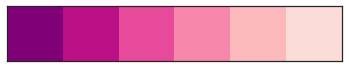

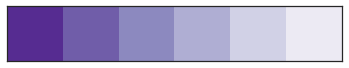

In [42]:
# colours
R = sns.color_palette("RdPu_r")
P = sns.color_palette("Purples_r")
sns.palplot(R)
sns.palplot(P)


0.76 0.0


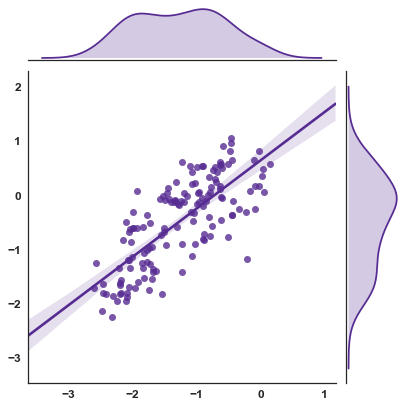

In [18]:
make_corr(df_PC2_STR,df_PC1_STR, 'IRON_T2','ANMC', P[0], annotate=0)

0.84 0.0


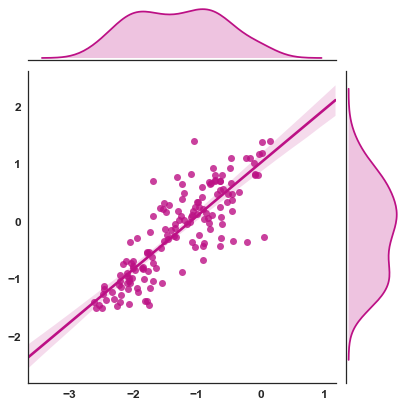

In [19]:
make_corr(df_PC2_STR,df_PC1_STR, 'IRON_T2','TCA', R[1], annotate=0)

In [ ]:
DAT1             = return_expression_df('DAT1')
DRD1             = return_expression_df('DRD1')
DRD2             = return_expression_df('DRD2')
DRD3             = return_expression_df('DRD3')
DRD4             = return_expression_df('DRD4')

0.23 0.0063613602


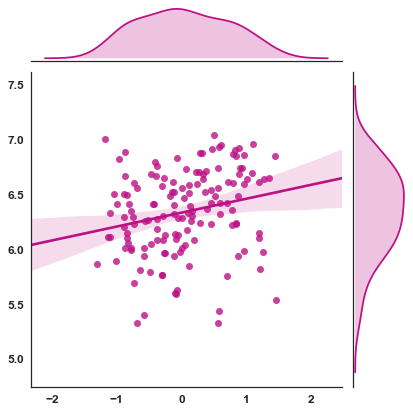

In [58]:
make_corr(df_PC1_STR, df_MU_STR, 'IRON_D','DRD2', R[1], annotate=0)


In [ ]:
df['DA_met']            = DA_met[measure] * xval
    df['DA_receptor_bind']  = DA_receptor_bind[measure] * xval
    df['DA_receptor_sig']   = DA_receptor_sig[measure] * xval
    df['DA_transmission']   = DA_transmission[measure] * xval
    df['DA_transport']      = DA_transport[measure] * xval

# '##############################################################'
# ' Permutations Follow '
# '##############################################################'

# Grab entire AHBA database (contains ~15000 annotated genes for now)
* Need to grab all data 20,737 genes 

In [14]:
# Concat ahba genes 
ahba_a = return_expression_df('18589_a').drop(drop_strings,axis =1)
ahba_b = return_expression_df('18589_b').drop(drop_strings,axis =1)
ahba_c = return_expression_df('18589_c').drop(drop_strings,axis =1)
ahba_d = return_expression_df('18589_d').drop(drop_strings,axis =1)
ahba_e = return_expression_df('18589_e').drop(drop_strings,axis =1)
ahba_f = return_expression_df('18589_f').drop(drop_strings,axis =1)
ahba_g = return_expression_df('18589_g')
AHBA   = pd.concat([ahba_a, ahba_b, ahba_c, ahba_d, ahba_e, ahba_f, ahba_g], axis =1 )
print 'Total Number of AHBA Genes =', len(AHBA.columns[:-13])

Total Number of AHBA Genes = 14995


In [66]:
AHBA = pd.read_csv(os.path.join(ahba_dir, 'ahba_data', 'AHBA_20737.csv'), index_col = 0)

# Restrict AHBA datframe to specific structures

In [84]:
def extract_struct_expression(df, roi, struct):
    structures = set(AHBA[struct].values)
    drop_structs = [i for i in structures if roi not in i]
    df_roi = df[~df[struct].isin(drop_structs)]
    return df_roi

AHBA_CAUD = extract_struct_expression(AHBA, 'caudate', 'structure_name').iloc[:,:-13]
AHBA_PUTA = extract_struct_expression(AHBA, 'putamen', 'structure_name').iloc[:,:-13]
AHBA_PALL = extract_struct_expression(AHBA, 'pallidus','structure_name').iloc[:,:-13]
AHBA_STR  = pd.concat([AHBA_CAUD,AHBA_PUTA])
AHBA_BG   = pd.concat([AHBA_CAUD,AHBA_PUTA, AHBA_PALL])

# PERUMTATIONS 

In [88]:
def make_permutation(df1, df2, met1,met2, GS1,GS2, df_AHBA, num_permutations, color1,color2):
    
    observed_correlation = np.round(pearsonr(df1[met1], df2[met2])[0],3)
    print 'Correlation between %s and %s = %s' %(met1,met2,observed_correlation)

    print 'Number of Genes in %s = %s' %(met1, len(GS1))
    print 'Number of Genes in %s = %s' %(met2, len(GS2))
    geneset_length = len(GS2)
    print 'Taking %s genes random sampling' %(geneset_length)
    print ''

    ###############
    ### Calculate correlation between geneset of interest and a random set of genes (10000 times)
    #GENES = df_AHBA.drop(drop_strings + GS1 + GS2, axis =1).columns
    GENES = df_AHBA.drop(GS1 + GS2, axis =1).columns
    print 'Number of total genes =',len(GENES)
   
    null_distribution = []
    for i in xrange(num_permutations):
        GENESET_RAND = random.sample(GENES, len(GS1))
        
        #create new dataframe with random genes only
        #df_rand      = df_AHBA.drop(drop_strings + GS1 + GS2 + [gene for gene in GENES if gene not in GENESET_RAND],axis=1)  
        df_rand      = df_AHBA.drop(GS1 + GS2 + [gene for gene in GENES if gene not in GENESET_RAND],axis=1)  
        
        # Calculate mean of the random set of genes and place into dataframe
        df_rand['int']     = df1[met1]
        #df_rand['int']    = df2[met2]
        df_rand['rand_mean']  = df_rand[GENESET_RAND].mean(axis=1)
        df_rand = df_rand.dropna()
        null_distribution.append(pearsonr(df_rand['int'], df_rand['rand_mean'])[0])

    print 'Null dist mean = ', np.mean(null_distribution)
    
    
    #######################
    # PLOT null distribution and observed correlation 
    plt.figure(figsize=(10, 6))
    #sns.set(style="white", palette="muted", color_codes=True)
    sns.set_style("white")
    g = sns.distplot(null_distribution, color=color1, hist=1, bins = 15)
    plt.axvline(np.mean(null_distribution), color=color2, linestyle='solid',linewidth=1)
    plt.axvline(np.percentile(null_distribution, 2.5), color=color1, linestyle='dashed', linewidth=1)
    plt.axvline(np.percentile(null_distribution, 97.5), color=color1, linestyle='dashed', linewidth=1)
    plt.axvspan(np.percentile(null_distribution, 2.5),np.percentile(null_distribution, 97.5) , alpha=0.2, color='lightgray')
    plt.axvline(observed_correlation, color=color2, linestyle='solid', linewidth=7)
    plt.yticks([0.5,1.5,2.5,3.5])
    #plt.xlim(-.5,.75)
    #plt.ylim(0,4)
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold')
    
    #plt.savefig(os.path.join(save_fig_dir, 'permute_GENE_%s_%s'%(met1,met2)), dpi = 300, bbox_inches='tight', transparent=1)
    

    sum_right = np.sum([i for i in null_distribution if i > observed_correlation])
    sum_all = np.sum(np.abs(np.asanyarray(null_distribution))) 
    p_val = sum_right / sum_all 
    print p_val
    
    #df_stats.loc['%s_%s'%(met2[0:8], met1)]['pval'] = p_val
    #return null_distribution

In [89]:
nperm = 1000

In [90]:
make_permutation(df_PC2_STR, df_PC1_STR, 'IRON_T2', 'ANMC', 
                 GS_IRON_T2, GS_ANMC, AHBA_STR, nperm, color1=P[0], color2='k')

Correlation between IRON_T2 and ANMC = 0.791
Number of Genes in IRON_T2 = 36
Number of Genes in ANMC = 33
Taking 33 genes random sampling



ValueError: labels ['FTH1'] not contained in axis

Correlation between IRON_T2 and TCA = 0.862
Number of Genes in IRON_T2 = 36
Number of Genes in TCA = 32
Taking 32 genes random sampling

Number of total genes = 14933
Null dist mean =  0.397120014441
0.000216474662953


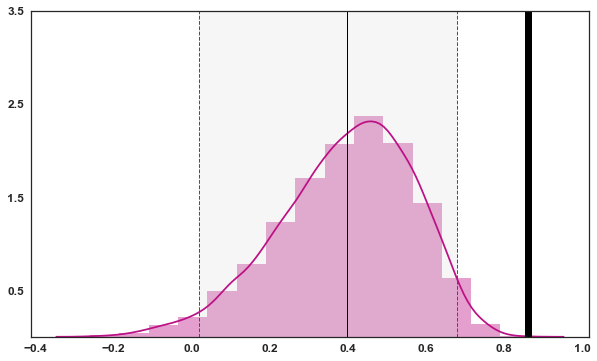

In [25]:
make_permutation(df_PC2_STR, df_PC1_STR, 'IRON_T2', 'TCA', 
                 GS_IRON_T2, GS_TCA, AHBA_STR, nperm, color1=R[1], color2='k')

In [61]:
make_permutation(df_PC1_STR, df_MU_STR, 'IRON_D', 'DRD1', 
                 GS_IRON_H, ['DRD1'], AHBA_STR, 100, color1='G', color2='k')

NameError: name 'AHBA_STR' is not defined

Correlation between BIOBANK and TCA = 0.636
Number of Genes in BIOBANK = 4
Number of Genes in TCA = 33
Taking 33 genes random sampling

Number of total genes = 14959
Null dist mean =  0.305766396404
0.194092850204


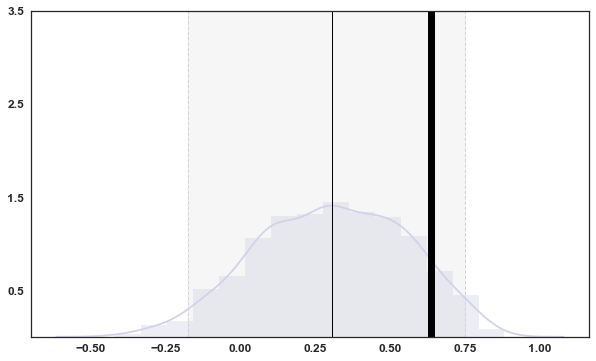

In [41]:
from math import pi
import matplotlib.pyplot as plt

def plot_loadings(gset, C, sorter='PC1'):
    # Set data
    if sorter != 'PC1':
        sorter = sorter
    loadings = pd.read_csv(os.path.join(ahba_dir,'loadings_%s.csv'%gset), index_col=0).sort_values(sorter, ascending=0)

    loading_index = [i for i in loadings.index]
    cat = loading_index
    values = list(loadings['PC1']) # [90, 60, 65, 70, 40]
    values2 = list(loadings['PC2']) # [90, 60, 65, 70, 40]
    values3 = list(loadings['PC3']) # [90, 60, 65, 70, 40]
    #values4 = list(loadings.PC4) # [90, 60, 65, 70, 40]

    N = len(cat)
    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # Because our chart will be circular we need to append a copy of the first 
    # value of each list at the end of each list with data
    values.append(list(loadings['PC1'])[0])
    values = np.abs(np.array(values))

    values2.append(list(loadings['PC2'])[0])
    values2 = np.abs(np.array(values2))

    values3.append(list(loadings['PC3'])[0])
    values3 = np.abs(np.array(values3))


    x_as += x_as[:1]

    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")

    # Create polar plot
    fig = plt.figure(figsize=(20,20))
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)

    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    #Set position of y-labels
    ax.set_rlabel_position(0)

    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=1)
    ax.yaxis.grid(True, color="#888888", linestyle='dashed', linewidth=1)##888888

    # Set number of radial axes and remove labels
    plt.xticks(x_as[:-1], loading_index, size = 25,weight='bold')
    #plt.xticks(x_as[:-1], [])

    # Set yticks
    #plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])

    alpha =0.75
    ax.fill(x_as, values,  rgb2hex(C[1]), alpha=alpha)
    ax.fill(x_as, values2, rgb2hex(C[3]), alpha=alpha)
    ax.fill(x_as, values3, rgb2hex(C[5]), alpha=alpha)
    #ax.fill(x_as, values4, 'm', alpha=0.5)

    plt.tick_params(axis='y', direction='in', labelsize=15)
    plt.tick_params(axis='x', direction='in', labelsize=15)
    #plt.savefig(os.path.join(save_fig_dir, 'loadings_%s.png'%gset), dpi = 300, bbox_inches='tight', transparent=1)


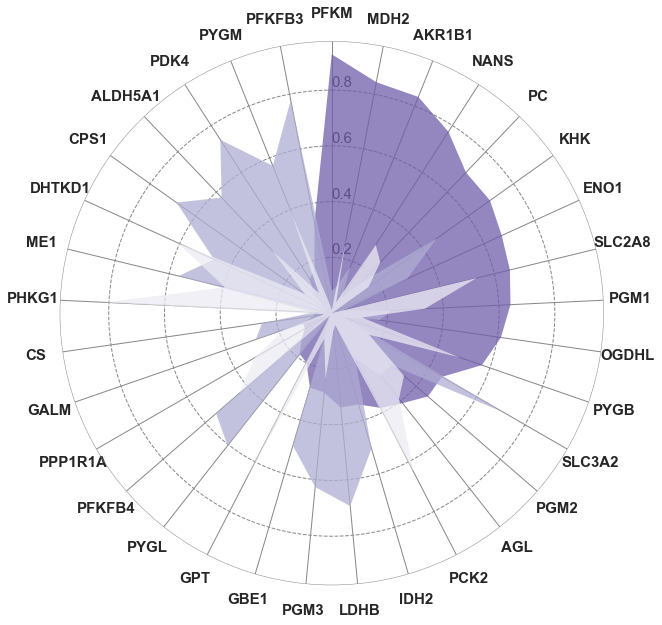

In [388]:
plot_loadings('ANMC', P, sorter='PC1')

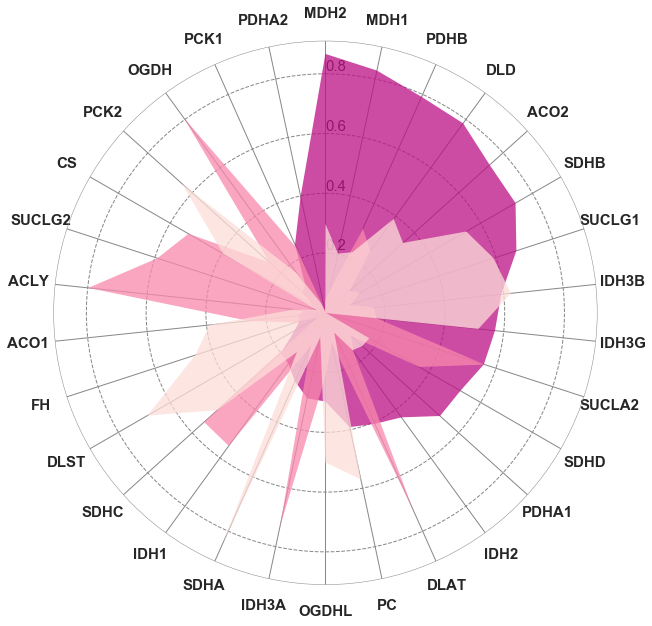

In [389]:
plot_loadings('TCA', R, sorter='PC1')

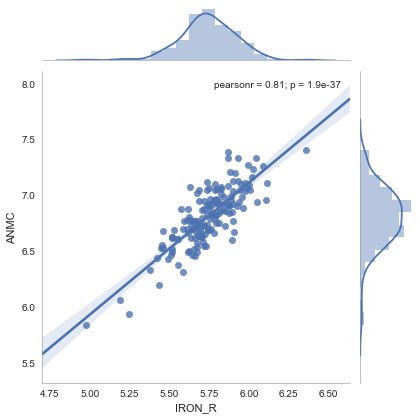

In [54]:
sns.jointplot(df_MU_STR.IRON_R,#.drop([2596]), 
              df_MU_STR.ANMC, kind ='reg')

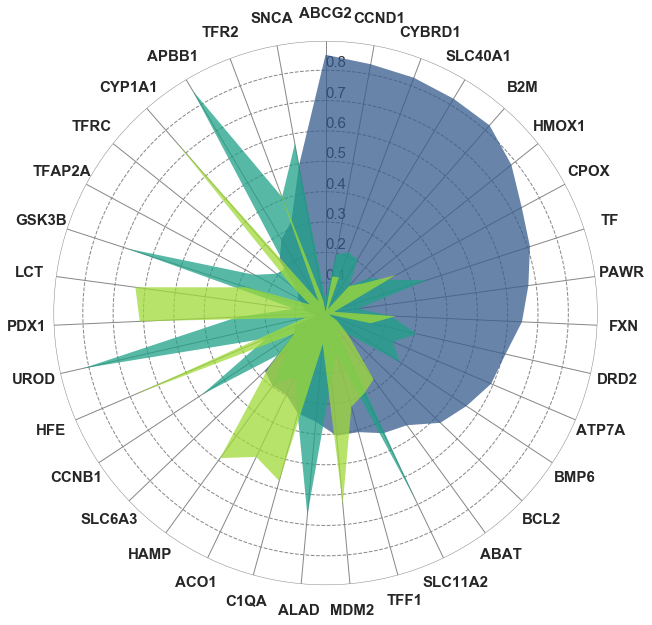

In [53]:
plot_loadings('IRON_RESPONSE', sns.color_palette("viridis"), sorter='PC1')

Correlation between IRON_R and ANMC = 0.814
Number of Genes in IRON_R = 4
Number of Genes in ANMC = 33
Taking 33 genes random sampling

Number of total genes = 14959
Null dist mean =  0.409974593752
0.00789947650046


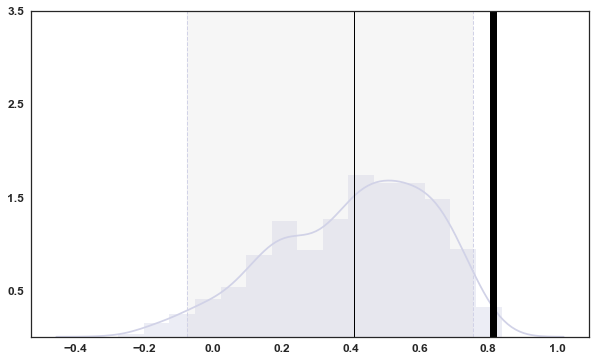

In [55]:
make_permutation(df_MU_STR, df_MU_STR, 'IRON_R', 'ANMC', 
                 GS_BIOBANK, GS_ANMC, AHBA_STR, 1000, color1=P[4], color2='k')

In [60]:
IRON_H.head()

,FTH1,FTL,HFE,HFE2,IL1A,IL6,IL6R,IREB2,SLC40A1,TF,...,SVD2g,SVD2p,SVD3g,SVD3p,corrected_mni_x,corrected_mni_y,corrected_mni_z,PC1,PC2,PC3
1001,13.027133,10.38276,2.129350,1.77232,1.97275,1.83800,3.94090,3.753933,3.62425,8.284033,...,-0.011612,-0.012067,-0.007268,-0.019726,29.911739,-2.115836,46.858707,-0.425516,-0.087833,-0.093521
1002,13.283433,10.70550,2.010083,1.99788,1.97140,2.00735,4.34515,3.856400,3.89855,9.077133,...,-0.003262,-0.005397,-0.004593,-0.009287,-34.143679,3.115101,53.592671,0.080386,0.207083,-0.109057
1003,13.069367,10.67690,2.245583,1.83012,1.79435,2.60605,3.65840,4.025167,3.51350,7.455567,...,-0.024504,-0.025310,0.002331,-0.009208,63.768605,-40.606923,-27.030654,-0.558440,0.337610,0.224915
1004,12.884000,10.61468,2.415017,1.92642,1.78925,2.44695,3.58305,3.923133,3.48345,6.989300,...,-0.030259,-0.031060,-0.001929,-0.010723,-55.572538,-39.520167,-31.188580,-0.750383,0.493154,0.524138
1005,12.790400,10.28232,2.530167,1.87638,1.70075,2.17450,3.73385,4.013700,3.57345,7.761467,...,-0.018357,-0.021820,-0.015698,-0.016109,-2.423746,-2.759299,27.899077,-0.890407,0.370066,-0.101598


In [92]:
def extract_top_struct_expression(df, roi, fname):
    structures = set(df['top_struct'].values)
    drop_structs = [i for i in structures if roi not in i]
    df_roi = df[~df['top_struct'].isin(drop_structs)]
    df_roi =  df_roi.drop(['PC1', 'PC2', 'PC3'],axis = 1)
    df_roi.to_csv(os.path.join(ahba_dir, '%s.csv'%fname))
    return df_roi

In [93]:
x = extract_top_struct_expression(IRON_H, 'striatum', 'STR_IRON_H')

In [94]:
IRON_H_STRx  = return_expression_df('STR_IRON_H_PCA')

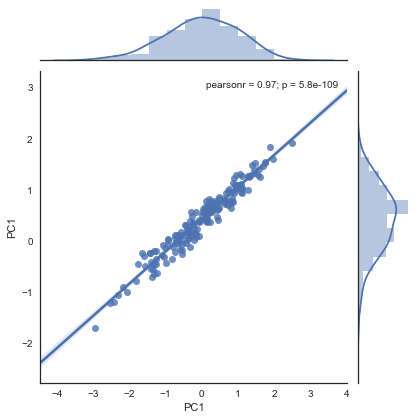

In [98]:
sns.jointplot(IRON_H_STRx.PC1, df_MU. , kind = 'reg')